# Hypothesis 3:

The amount of crimes will increase as the proportion of high-income residents increases and the proportion of low-income residents decreases

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def load_boston_crime(filename):
    data = pd.read_csv(filename)
    data_street_year = data.groupby(['STREET']).size()
    data_street_year = data_street_year.reset_index()
    data_street_year.columns = ['street', 'crime_count']
    data_street_year = data_street_year.astype({'street':str})
    return data_street_year

boston_crime = load_boston_crime('data/boston_crime.csv')

/var/folders/vz/rdt2gv7d2mqft7p3lsdk5hz40000gn/T/ipykernel_74608/4229323655.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


In [6]:
def line_chart_for_street_avg_group(file_path, crime_street_year, y_label):
    bldg_group = pd.read_csv(file_path)
    bldg_group.columns = ['street', y_label]
    bldg_group.dropna(inplace=True)
    bldg_group = bldg_group.astype({'street': str})
    bldg_group_street_crime = pd.merge(bldg_group, crime_street_year)
    bldg_group_street_crime = bldg_group_street_crime.astype({y_label: float})
    bldg_group_street_crime.sort_values(by=y_label, inplace=True)
    bldg_group_street_crime['chart_group'] = bldg_group_street_crime[y_label].apply(lambda x: int(x / 5))
    bldg_group_street_crime_group = bldg_group_street_crime.groupby('chart_group').agg({'crime_count': 'sum'}).reset_index()
    plt.figure(figsize=(10, 10))
    plt.plot(bldg_group_street_crime_group['chart_group'], bldg_group_street_crime_group['crime_count'],color = 'r',label="criminal tend")
    plt.xlabel(y_label)
    plt.ylabel("criminal amount")
    plt.legend(loc = "best")
    plt.show()

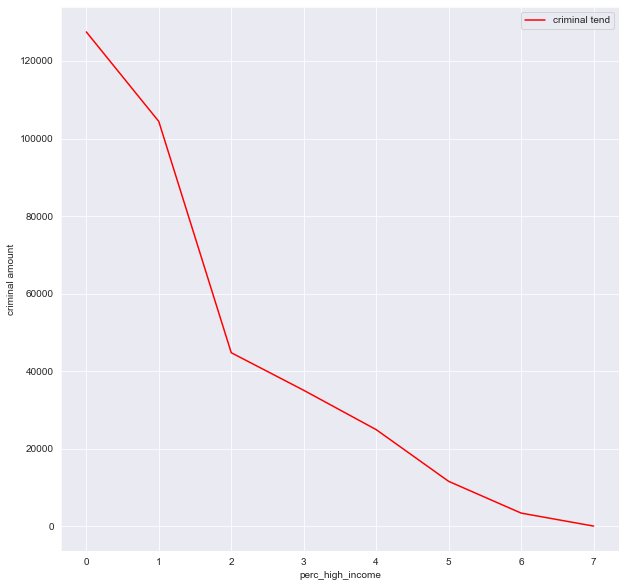

In [7]:
# line chart for high income
line_chart_for_street_avg_group('prep_data/boston_bldg_by_high_income.csv', boston_crime, 'perc_high_income')

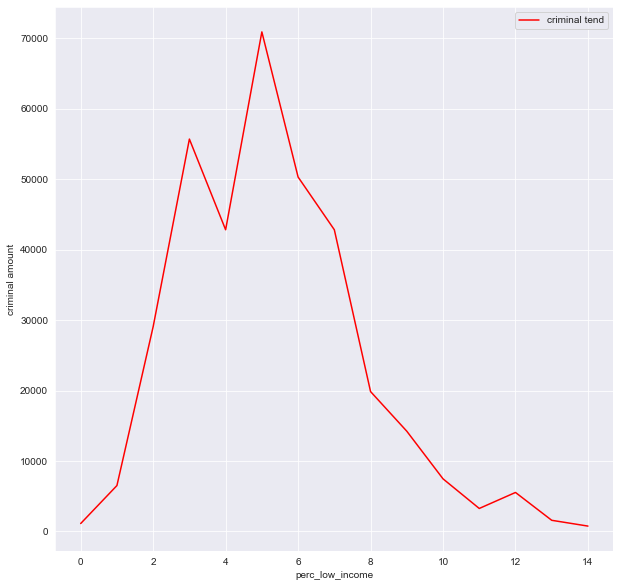

In [8]:
# line chart for low income
line_chart_for_street_avg_group('prep_data/boston_bldg_by_low_income.csv', boston_crime, 'perc_low_income')

In [9]:
def street_avg_group(file_path, crime_street_year, y_label):
    bldg_group = pd.read_csv(file_path)
    bldg_group.columns = ['street', y_label]
    bldg_group.dropna(inplace=True)
    bldg_group = bldg_group.astype({'street': str})
    bldg_group_street_crime = pd.merge(bldg_group, crime_street_year)
    bldg_group_street_crime = bldg_group_street_crime.astype({y_label: float})
    bldg_group_street_crime.sort_values(by=y_label, inplace=True)
    bldg_group_street_crime['chart_group'] = bldg_group_street_crime[y_label].apply(lambda x: int(x / 5))
    bldg_group_street_crime_group = bldg_group_street_crime.groupby('chart_group').agg({'crime_count': 'sum'}).reset_index()
    bldg_group_street_crime_group.columns = ['group', 'crime_count']
    return bldg_group_street_crime_group

In [10]:
high_income = street_avg_group('prep_data/boston_bldg_by_high_income.csv', boston_crime, 'perc_high_income')
high_income

,group,crime_count
0,0,127484
1,1,104408
2,2,44783
3,3,35098
4,4,24957
5,5,11625
6,6,3441
7,7,90


In [11]:
low_income = street_avg_group('prep_data/boston_bldg_by_low_income.csv', boston_crime, 'perc_low_income')
low_income

,group,crime_count
0,0,1129
1,1,6518
2,2,29068
3,3,55693
4,4,42823
5,5,70904
6,6,50308
7,7,42825
8,8,19857
9,9,14231


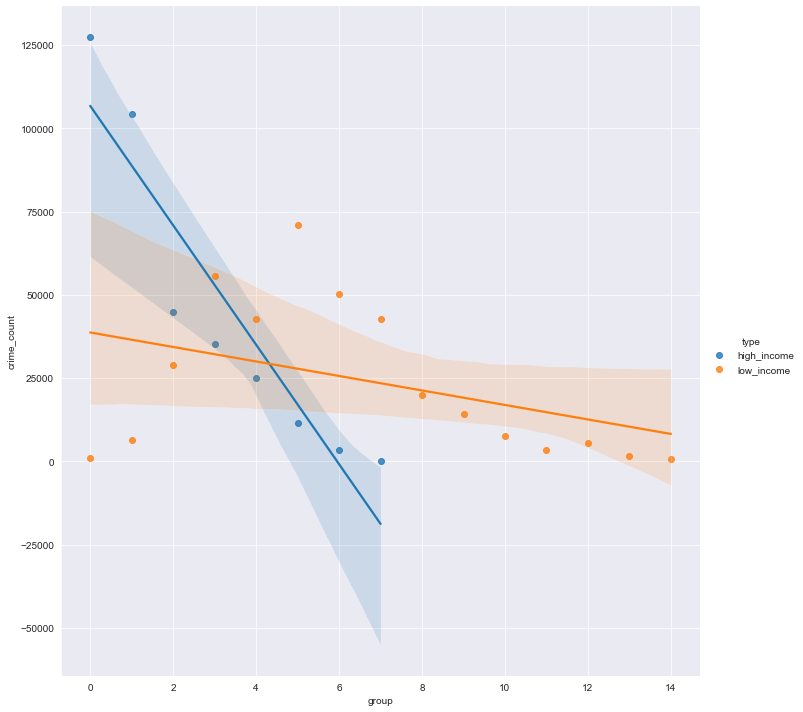

In [16]:
def plot_regression():
    high_income['type'] = 'high_income'
    low_income['type'] = 'low_income'
    income_regression = pd.concat([high_income, low_income])
    income_regression = income_regression.iloc[:,[0, 1,2,]]
    g = sns.lmplot(x="group", y="crime_count", hue="type", data=income_regression, height=10)

plot_regression()